In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale = 1.5)
sns.set_style("white")

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [5]:
ds = fetch_california_housing(as_frame = True)
ds_df = pd.DataFrame(ds.data, columns = ds.feature_names)

In [21]:
def get_california_housing():
    dataset = fetch_california_housing()
    df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
    df['MedHouseVal'] = dataset.target
    df.index.name = 'record'
    
    X_train, X_test, y_train, y_test = \
    train_test_split(df.loc[:, df.columns != 'MedHouseVal'],df['MedHouseVal'], test_size = .33, random_state = 1)
    
    return [X_train, X_test, y_train, y_test]

- 줄이 너무 길때는 \ 적고 ENTER 하기

## 선형 회귀

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = get_california_housing()

clf = LinearRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score is ' + str(r2))

r2 score is 0.5975983619028757


# 수축과 규제화를 하는 이유
- 데이터 수가 회귀식의 요인수보다 적을 경우 최소제곱 계수 추정치가 존재하지 않게 된다.
- 이를 극복하기 위해서는 몇몇 회귀 계수들을 선택하는 방법과 전체 회귀계수를 선택하되 계수 추정치들을 0에 근사하게 만드는 방법이 있다.

# 페널티 회귀를 활용한 규제화 (Regularization)

In [43]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = get_california_housing()

for model in [Lasso, Ridge]:
    clf = model(alpha = 0.3)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(str(model)[-7:-2] + ' ' + 'r2 score is = ' + str(r2))

Lasso r2 score is = 0.48910594774361116
Ridge r2 score is = 0.5975969505991519


# 분류 예제 데이터

In [44]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

def get_moon_data():
    X, y = make_moons(n_samples = 150, noise = 0.4, random_state = 42)
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.33, random_state = 42)
    
    return [X_train, X_test, y_train, y_test]

# 로지스틱 회귀

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

#clf = LogisticRegression(solver = 'lbfgs')
clf = LogisticRegression(solver='lbfgs', penalty='l2', C=0.5) # 규제화된 로지스틱 회귀
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('f1_score is = ' + str(f1))

f1_score is = 0.7499999999999999


# Confusion Matrix

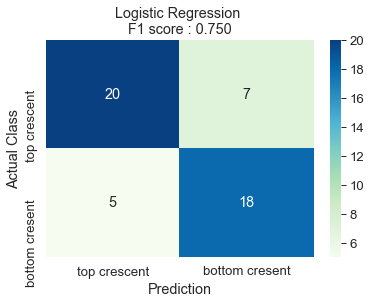

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_pred, y_test)

labels = ['top crescent', 'bottom cresent']
df_cm = pd.DataFrame(cm, index = labels, columns = labels)

plt.figure(figsize = (6,4))
sns.heatmap(df_cm, cmap = 'GnBu', annot = True)

plt.title("Logistic Regression \nF1 score : {0:.3f}".format(f1_score(y_test, y_pred)))
plt.xlabel('Prediction')
plt.ylabel('Actual Class')
plt.show()

# 서포트 벡터 머신 (Support Vector Machines)

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

clf = SVC(kernel = 'linear', C= 0.5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('f1 score is ' + str(f1))

f1 score is 0.7499999999999999


## 가우시안 커널 분류를 사용한 서포트 벡터 머신

In [57]:
clf = SVC(gamma = 2 , C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('f1 score is ' + str(f1))

f1 score is 0.782608695652174


# 트리 기반 분류

##  의사결정트리(Decision Tree Classification)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

print('f1 score is ' + str(f1))

f1 score is 0.7391304347826089


## 랜덤 포레스트

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = get_moon_data()

clf = RandomForestClassifier(max_depth = 4, n_estimators = 10,
                             max_features = 'sqrt', random_state = 42,
                            oob_score = True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)

oob_score = clf.oob_score_

print('f1 score is = ' + str(f1))
print('OOB score is = ' + str(oob_score))


f1 score is = 0.7659574468085107
OOB score is = 0.73


# 교차 검증(Cross_validation)

## 검증 데이터 셋 생성

In [65]:
from sklearn.datasets import load_iris
dataset = load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size = 0.33)

X_train, X_val, y_train, y_val = \
train_test_split(X,y, test_size = 0.33)


# k-폴드 교차 검증

In [66]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

clf = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'f1_macro')
print(scores)

[0.94747475 0.94747475 0.84242424 1.         0.94405594]


# 초매개변수 튜닝을 위한 그리드 검색

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel' : ('linear', 'rbf'), 'C' : [1, 5, 10]}
svc = SVC(gamma = 'auto')
clf = GridSearchCV(svc, parameters, cv= 5, scoring = 'f1_macro')
clf.fit(X_train, y_train)

print('Best score is ' + str(clf.best_score_))
print('Best parameters are = ' + str(clf.best_params_))

Best score is 0.9888111888111888
Best parameters are = {'C': 1, 'kernel': 'linear'}
